In [1]:
#setup
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community


In [2]:
# read edge list
g = nx.read_edgelist("ingredients.txt")
ug = nx.to_undirected(g)

In [3]:
#bi to uni 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
from networkx.algorithms import bipartite


g = nx.read_edgelist("ingredients.txt")
c = bipartite.color(g)
nx.set_node_attributes(g, c, 'bipartite')

type1  = {n for n, d in g.nodes(data=True) if d['bipartite']==0}
type2  = {n for n, d in g.nodes(data=True) if d['bipartite']==1}
ug1 = bipartite.projected_graph(g, type1)
ug2 = bipartite.projected_graph(g, type2)

print('Uni Graph 1:\n'+nx.info(ug1))

print('Uni Graph 2:\n'+nx.info(ug2))

Uni Graph 1:
Name: 
Type: Graph
Number of nodes: 63
Number of edges: 310
Average degree:   9.8413
Uni Graph 2:
Name: 
Type: Graph
Number of nodes: 16
Number of edges: 44
Average degree:   5.5000


Graph1:


C:\Users\PAKLAP.PK\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


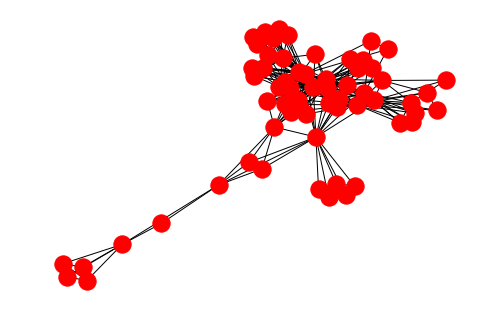

Graph2:


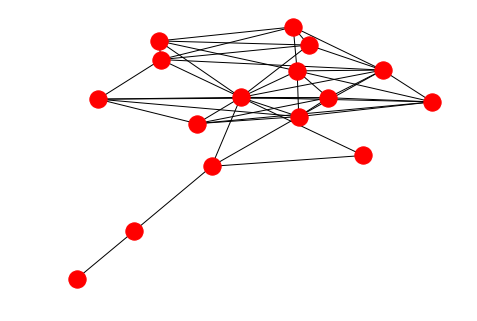

In [4]:
#graphs
print('Graph1:')
nx.draw(ug1)
plt.show()
print('Graph2:')
nx.draw(ug2)
plt.show()

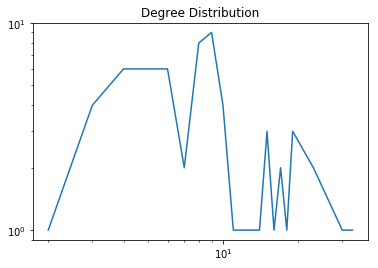

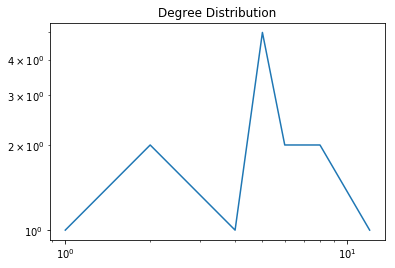

In [39]:
#degree distributor
def plot_degree_distribution(wiki):
    degs = {}
    for n in wiki.nodes():
        deg = wiki.degree(n)

        if deg not in degs:
            degs[deg] = 0

        degs[deg] += 1
    items = sorted(degs.items())

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k, v) in items], [v for (k, v) in items])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title("Degree Distribution")
    fig.savefig("degree_distribution.png")


plot_degree_distribution(ug1)
plot_degree_distribution(ug2)

Graph1


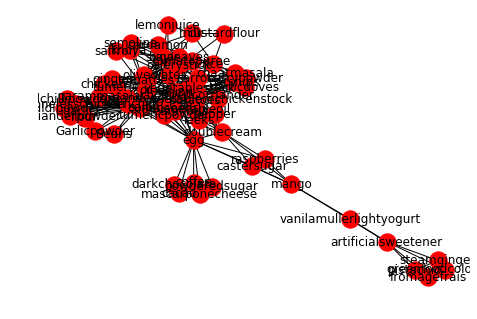

In [9]:
# draw a network with labels
print('Graph1')
nx.draw(ug1, with_labels=True)


Graph2


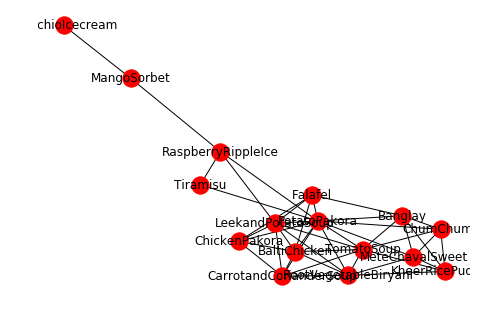

In [10]:
# draw a network with labels
print('Graph2')
nx.draw(ug2, with_labels=True)


In [37]:
# basic analysis

# number of nodes
print("number of nodess:",nx.number_of_nodes(ug1))

#number of edges
print("number of edges:",nx.number_of_edges(ug1))

#average clustering
print('average clustering: ',nx.average_clustering(ug1))

# diameter
print("Diameter:",nx.diameter(ug1))
# this diameter shows ...

# average degree
sum = 0
for n in ug1.nodes():
    sum = sum + ug1.degree(n)
print("Average degree:", sum/ug1.number_of_nodes())

number of nodess: 63
number of edges: 310
average clustering:  0.8302552527783592
Diameter: 5
Average degree: 9.841269841269842


In [38]:
# basic analysis

# number of nodes
print("number of nodes:",nx.number_of_nodes(ug2))

#number of edges
print("number of edges:",nx.number_of_edges(ug2))

#average clustering
print('Average Clustering: ', nx.average_clustering(ug2))

# diameter
print("Diameter:",nx.diameter(ug2))
# this diameter shows ...

# average degree
sum = 0
for n in ug2.nodes():
    sum = sum + ug2.degree(n)
print("Average degree:", sum/ug2.number_of_nodes())

number of nodes: 16
number of edges: 44
Average Clustering:  0.5961444805194804
Diameter: 5
Average degree: 5.5


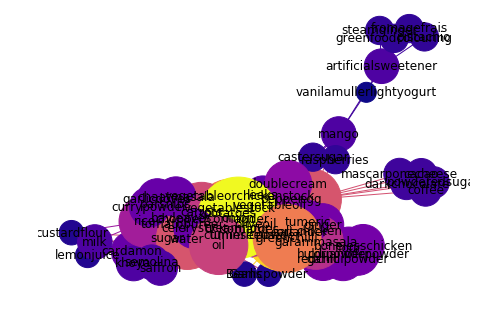

In [19]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug1.nodes():
    d.append(ug1.degree(n))
    
ec = [] # create a set
for e in ug1.edges():
    if(ug1.degree(e[0]) > ug1.degree(e[1])):
        ec.append(ug1.degree(e[0]))
    else:
        ec.append(ug1.degree(e[1]))
    
pos = nx.spring_layout(ug1, iterations=200)

factor = 200 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug1, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d],with_labels=True) # node sizse

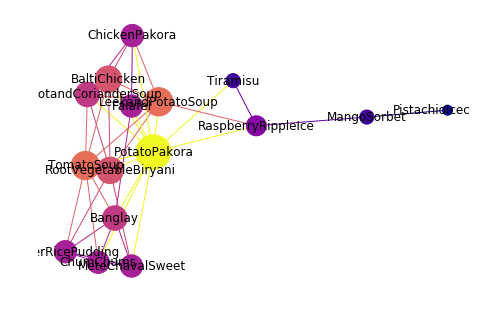

In [21]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug2.nodes():
    d.append(ug2.degree(n))
    
ec = [] # create a set
for e in ug2.edges():
    if(ug2.degree(e[0]) > ug2.degree(e[1])):
        ec.append(ug2.degree(e[0]))
    else:
        ec.append(ug2.degree(e[1]))
    
pos = nx.spring_layout(ug2, iterations=200)

factor = 100 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug2, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d],with_labels=True) # node sizse

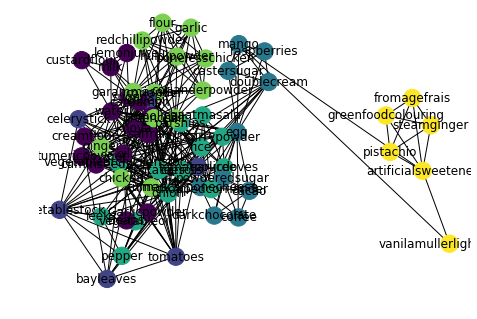

In [23]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(ug1)
pos = community_layout(ug1, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug1,pos, node_color=cols, with_labels=True); 
plt.show()

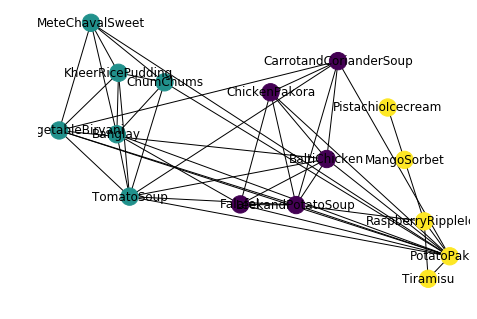

In [24]:
# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777
# you need to install louvain package by using the following command
# pip install python-louvain --user


def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

from community import community_louvain
partition = community_louvain.best_partition(ug2)
pos = community_layout(ug2, partition)
cols = [float(i) for i in partition.values()]
nx.draw(ug2,pos, node_color=cols, with_labels=True); 
plt.show()

Node Degree
This graph shows the number of common ingredients shared between the different recipes

CarrotandCorianderSoup 6
KheerRicePudding 5
MangoSorbet 2
Tiramisu 2
BaltiChicken 7
LeekandPotatoSoup 8
PotatoPakora 12
Falafel 5
Banglay 6
RaspberryRippleIce 4
ChumChums 5
TomatoSoup 8
MeteChavalSweet 5
PistachioIcecream 1
ChickenPakora 5
RootVegetableBiryani 7


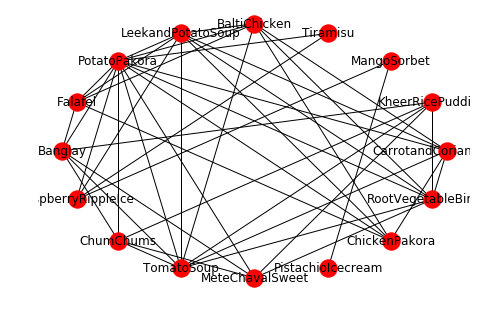

In [30]:
import matplotlib.pyplot as plt
import networkx as nx


print("Node Degree\nThis graph shows the number of common ingredients shared between the different recipes\n")
for v in ug2:
    print('%s %s' % (v, ug2.degree(v)))

nx.draw_circular(ug2, with_labels=True)
plt.show()

Node Degree

custardflour 3
vegetablestock 14
tumericpowder 10
Garlicpowder 3
egg 19
vegetableoil 10
bayleaves 8
potatoes 23
mascarponecheese 5
bonelesschicken 9
vegetableorchickenstock 5
Beans 3
pepper 7
artificialsweetener 6
creamflour 10
garlic 9
darkchocolate 5
parsnips 8
coffee 5
coriander 19
oliveoil 15
ginger 9
tomatopuree 8
pistachio 4
cardamon 8
garlicdoves 8
flour 9
sugar 17
khoya 6
mango 6
carrots 18
steamginger 4
cacao 5
lemonjuice 3
rice 13
milk 6
vanilamullerlightyogurt 2
raspberries 4
chicken 9
cuminseeds 10
fromagefrais 4
corianderpowder 9
leeks 7
castersugar 4
huldipowder 9
water 19
chaatmasala 8
powderedsugar 5
salt 30
tomatoes 15
semolina 6
doublecream 11
choppedcorriander 16
currypowder 8
redchillipowder 9
garammasala 15
tumeric 9
onion 33
celerystick 8
saffron 6
greenfoodcolouring 4
oil 17
greenchilli 23


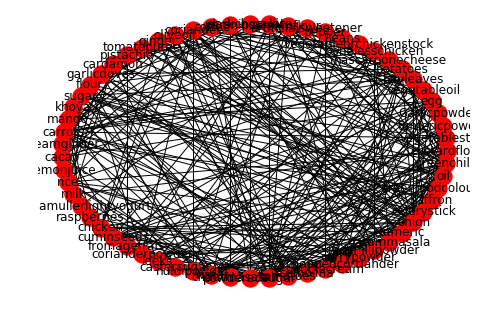

In [32]:
import matplotlib.pyplot as plt
import networkx as nx


print("Node Degree\n")
for v in ug1:
    print('%s %s' % (v, ug1.degree(v)))

nx.draw_circular(ug1, with_labels=True)
plt.show()